# Proyecto Accidentes Aéreos

In [3]:
# Se importan las librerías necesarias.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Abrimos el archivo para poder trabajar sobre éste.
df_AE = pd.read_csv('AccidentesAviones.csv')


In [5]:
# Se realiza una breve visualización de las columnas y la información que contiene.
df_AE.head(5)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [6]:

# Se renombran algunas columnas para identificarlas más facilmente.
## Se procede colocando en una lista los nombres originales de cada columna que se pretenden cambiar y luego una lista con los nuevos nombres para posteriormente realizar un rename sobre la tupla del diccionario que se ha creado a partir de las listas.

originales = ['HORA declarada','OperadOR', 'flight_no', 'route', 'ac_type', 'all_aboard','PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos','passenger_fatalities', 'crew_fatalities']
nuevas = ['Hora','Operador', '# Vuelo', 'Tipo de vuelo', 'Tipo de Aeronave','Total de personas a bordo', 'Pasajeros','Tripulacion', 'Muertes totales','Muertes de pasajeros','Muertes de tripulacion']

df_AE = df_AE.rename(columns=dict(zip(originales, nuevas)))

In [7]:
# Se eliminan algunas columnas que considero irrelevantes ('cn_ln' y ' registation') dado que no pienso enfocar mi análisis sobre esta información.
df_AE = df_AE.drop(df_AE.columns[:1], axis=1)
df_AE = df_AE.drop(columns=['cn_ln','registration','# Vuelo'])

In [8]:
# Se modifica la columna 'Hora' para poder visualizar la información en formato HH:MM.
df_AE['Hora'] = df_AE['Hora'].astype(str) # Se convierte la información almacenada en las filas de la columna 'Hora' en tipo String para poder ejecutar la función lambda concatenando con ':'.
df_AE['Hora'] = df_AE['Hora'].apply(lambda x: x[:2] + ':' + x[2:]) # Se concatena la información que exista en la fila con el símbolo':' a partir del segundo caracter y se añade la parte final que estaba almacenada allí.

In [9]:
df_AE.head(5)

,fecha,Hora,Ruta,Operador,Tipo de vuelo,Tipo de Aeronave,Total de personas a bordo,Pasajeros,Tripulacion,Muertes totales,Muertes de pasajeros,Muertes de tripulacion,ground,summary
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?:,"Juvisy-sur-Orge, France",?,Air show,Wright Byplane,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",?:,"Victoria, British Columbia, Canada",Private,?,Curtiss seaplane,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",18:30,Over the North Sea,Military - German Navy,?,Zeppelin L-1 (airship),20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [10]:
df_AE.tail(5)

,fecha,Hora,Ruta,Operador,Tipo de vuelo,Tipo de Aeronave,Total de personas a bordo,Pasajeros,Tripulacion,Muertes totales,Muertes de pasajeros,Muertes de tripulacion,ground,summary
5003,"March 28, 2021",18:35,"Near Butte, Alaska",Soloy Helicopters,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,"May 21, 2021",18:00,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,Beechcraft B300 King Air 350i,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,"June 10, 2021",08:00,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,Naypyidaw - Anisakan,Beechcraft 1900D,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,"July 04, 2021",11::30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,96,88,8,50,?,?,3,"While attempting to land at Jolo Airport, the ..."
5007,"July 06, 2021",15:00,"Palana, Russia",Kamchatka Aviation Enterprise,Petropavlovsk - Palana,Antonov An 26B-100,28,22,6,28,22,6,0,The passenger plane crashed into the top of a ...


In [11]:

# Se crea la columna Hora HH para que únicamente tome los valores sin minutos para facilitar el análisis posterior.
## Adicionalmente es importante realizar limpieza y normalización de los datos en la columna Hora, dado que al momento de hacer las modificaciones se han generado nuevos errores en la información.

df_AE['Hora'] = df_AE['Hora'].replace('?:', 'Null')
df_AE['Hora HH'] = df_AE['Hora'].str[:2]
df_AE['Hora HH'] = df_AE['Hora HH'].str[:2]
df_AE['Hora HH'] = df_AE['Hora HH'].replace('Nu:', 'Null')
df_AE['Hora HH'] = df_AE['Hora HH'].replace('c ', 'Null')
df_AE['Hora HH'] = df_AE['Hora HH'].replace('c:', 'Null')
df_AE['Hora HH'] = df_AE['Hora HH'].replace('0:', '00')
df_AE['Hora HH'] = df_AE['Hora HH'].replace('1:', '01')
df_AE['Hora HH'] = df_AE['Hora HH'].replace('Nu', 'Null')
df_AE['Hora HH'] = df_AE['Hora HH'].replace('90', '09')
df_AE['Hora HH'] = df_AE['Hora HH'].replace('24', '02')
df_AE = df_AE.drop(columns='Hora')

In [12]:
#Valores únicos para Hora.
unique_values_HORA = df_AE['Hora HH'].unique()
unique_values_HORA.sort()
print(unique_values_HORA)
print('Los valores únicos para Hora HH son', len(unique_values_HORA))

['00' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13'
 '14' '15' '16' '17' '18' '19' '20' '21' '22' '23' 'Null']
Los valores únicos para Hora HH son 25


In [13]:
#Valores únicos para Hora.
unique_values_fecha = df_AE['fecha'].unique()
unique_values_fecha.sort()
print(unique_values_fecha)
print('Los valores únicos para Fecha son', len(unique_values_fecha))

['April 01, 1935' 'April 01, 1936' 'April 01, 1946' ...
 'September 30, 1980' 'September 30, 1994' 'September 30, 2017']
Los valores únicos para Fecha son 4577


In [14]:
# se realiza una modificación en el formato de la fecha, cambiándolo a formato DD/MM/AAAA

df_AE['fecha'] = pd.to_datetime(df_AE['fecha']).dt.strftime('%d/%m/%Y')

In [15]:
# Número de valores únicos para Tipo de Aeronave
unique_values_Aero = df_AE['Tipo de Aeronave'].unique()
print('Número de valores únicos para Tipo de Aeronave:', len(unique_values_Aero))
top_5_repeated = df_AE['Tipo de Aeronave'].value_counts().head(5)
Bottom_5_repeated = df_AE['Tipo de Aeronave'].value_counts().tail(5)
print('----------------------------------Top' ,top_5_repeated)
print('----------------------------------Bottom', Bottom_5_repeated)

Número de valores únicos para Tipo de Aeronave: 2469
----------------------------------Top Tipo de Aeronave
Douglas DC-3                                333
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                70
Douglas C-47                                 64
Douglas DC-4                                 41
Name: count, dtype: int64
----------------------------------Bottom Tipo de Aeronave
Vickers Viscount 759D       1
H-21B                       1
Avro 685 York C1            1
Piper PA-24-250 Comanche    1
Antonov An 26B-100          1
Name: count, dtype: int64


In [16]:
# Número de valores únicos para Tipo de vuelo
unique_values_TV = df_AE['Tipo de vuelo'].unique()
print('Número de valores únicos para Tipo de vuelo:', len(unique_values_TV))
top_5_repeated = df_AE['Tipo de vuelo'].value_counts().head(10)
Bottom_5_repeated = df_AE['Tipo de vuelo'].value_counts().tail(5)
print('----------------------------------Top' ,top_5_repeated)
print('----------------------------------Bottom', Bottom_5_repeated)

Número de valores únicos para Tipo de vuelo: 3839
----------------------------------Top Tipo de vuelo
?                             762
Training                       96
Sightseeing                    31
Test flight                    23
Sao Paulo - Rio de Janeiro      7
Test                            6
Rio de Janeiro - Sao Paulo      5
Huambo - Luanda                 4
Villavicencio - Mitu            4
Barranquilla - Bogota           4
Name: count, dtype: int64
----------------------------------Bottom Tipo de vuelo
Prague - Zurich                         1
Temuco - Santiago                       1
Hong Kong - Tainan AFB                  1
Fort Lamy, Chad - Marseilles, France    1
Petropavlovsk - Palana                  1
Name: count, dtype: int64


In [17]:
# Número de valores únicos para Operador
unique_values_op = df_AE['Operador'].unique()
print('Número de valores únicos para Operador:', len(unique_values_op))
top_5_repeated = df_AE['Operador'].value_counts().head(5)
Bottom_5_repeated = df_AE['Operador'].value_counts().tail(5)
print('----------------------------------Top' ,top_5_repeated)
print('----------------------------------Bottom', Bottom_5_repeated)

Número de valores únicos para Operador: 2268
----------------------------------Top Operador
Aeroflot                     253
Military - U.S. Air Force    141
Air France                    74
Deutsche Lufthansa            63
United Air Lines              44
Name: count, dtype: int64
----------------------------------Bottom Operador
Sierra Pacific Airlines             1
Pathet Lao Airlines                 1
Military - West German Air Force    1
Cessnyca                            1
Kamchatka Aviation Enterprise       1
Name: count, dtype: int64


In [18]:
# se crea la columna Páis, haciendo un split, lo que me permite dividir la información a partir de ',' posteriormente se elige la última columna proveniente del split, dado que esta es la columna que define el país.
df_AE['Pais'] = df_AE['Ruta'].str.split(',').str[-1].str.strip()
df_AE = df_AE.drop(columns=['Ruta'])

In [19]:
# Valores únicos para País
unique_values_pais = df_AE['Pais'].unique()
print('Número de valores únicos para Pais:', len(unique_values_pais))
top_5_repeated = df_AE['Pais'].value_counts().head(10)
Bottom_5_repeated = df_AE['Pais'].value_counts().tail(5)
print('----------------------------------Top' ,top_5_repeated)
print('----------------------------------Bottom', Bottom_5_repeated)

Número de valores únicos para Pais: 519
----------------------------------Top Pais
Russia        254
Brazil        175
Colombia      151
Canada        129
France        125
California    116
India         104
Alaska        104
England       101
Indonesia      99
Name: count, dtype: int64
----------------------------------Bottom Pais
Over the North Pacific Ocean    1
Over North Carolina             1
Washingon                       1
HI)                             1
Micronesia                      1
Name: count, dtype: int64


In [20]:
# Se realiza una lista con todos los estados de EEUU para poder homologar esa información al país ' United States', de igual manera se incluyen algunos typos identificados durante el proceso (es importante indicar que debido a quue existen casos de typos muy puntuales y poco significativos para el análisis, no se realiza con todos los typos presentados)

estados = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
    'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
    'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
    'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
    'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
    'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
    'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
    'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
    'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
    'West Virginia', 'Wisconsin', 'Wyoming', 'Washington DC', 'Over North Carolina','Washingon',': Massachusetts', 'Alakska', 'Cailifornia','Atlantic Ocean off Florida','Massachutes'
]
df_AE['Pais'] = df_AE['Pais'].replace(estados, 'United States')
df_AE['Pais'] = df_AE['Pais'].replace('Off Puerto Rico', 'Puerto Rico')
df_AE['Pais'] = df_AE['Pais'].replace(['UK','Forest-in-Teesdale. United Kingdom'], 'United Kingdom')
df_AE['Pais'] = df_AE['Pais'].replace(['Boliva'], 'Bolivia')

A partir de este punto mi interés se centrará en las columnas 'Total de personas a bordo', 'Pasajeros', 'Tripulacion', 'Muertes totales', 'Muertes de pasajeros', 'Muertes de tripulacion', 'ground'.
Éste interés es debido a que son las columnas que representan los datos de los accidentes como tal y darán dirección a los análisis posteriores en Power BI.

In [21]:
columnas = ['Total de personas a bordo', 'Pasajeros', 'Tripulacion', 'Muertes totales', 'Muertes de pasajeros', 'Muertes de tripulacion', 'ground']

# Convert non-numeric values to NaN
df_AE[columnas] = df_AE[columnas].apply(pd.to_numeric, errors='coerce')

# Calculate statistics for each column
average = df_AE[columnas].mean()
maximum = df_AE[columnas].max()
minimum = df_AE[columnas].min()
standard_deviation = df_AE[columnas].std()

print("-------------------------------Average:")
print(average)
print("\n-----------------------------Maximum:")
print(maximum)
print("\n-----------------------------Minimum:")
print(minimum)
print("\n-----------------------------Standard_deviation:")
print(standard_deviation)

-------------------------------Average:
Total de personas a bordo    31.121218
Pasajeros                    26.877376
Tripulacion                   4.519524
Muertes totales              22.294000
Muertes de pasajeros         18.940708
Muertes de tripulacion        3.587262
ground                        1.718372
dtype: float64

-----------------------------Maximum:
Total de personas a bordo     644.0
Pasajeros                     614.0
Tripulacion                    83.0
Muertes totales               583.0
Muertes de pasajeros          560.0
Muertes de tripulacion         43.0
ground                       2750.0
dtype: float64

-----------------------------Minimum:
Total de personas a bordo    0.0
Pasajeros                    0.0
Tripulacion                  0.0
Muertes totales              0.0
Muertes de pasajeros         0.0
Muertes de tripulacion       0.0
ground                       0.0
dtype: float64

-----------------------------Standard_deviation:
Total de personas a bordo    45

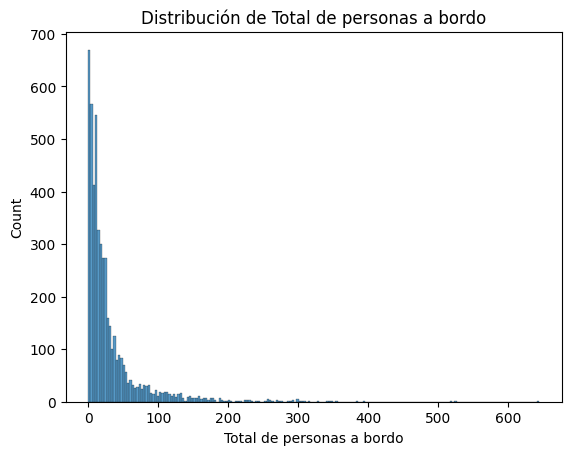

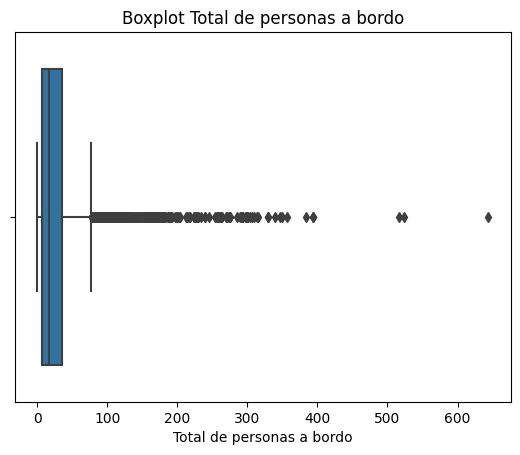

In [22]:

#Columna a explorar: 'Total de personas a bordo'

sns.histplot(data=df_AE, x='Total de personas a bordo')
plt.title(f'Distribución de Total de personas a bordo')
plt.show()
    
sns.boxplot(data=df_AE, x='Total de personas a bordo')
plt.title(f'Boxplot Total de personas a bordo')
plt.show()


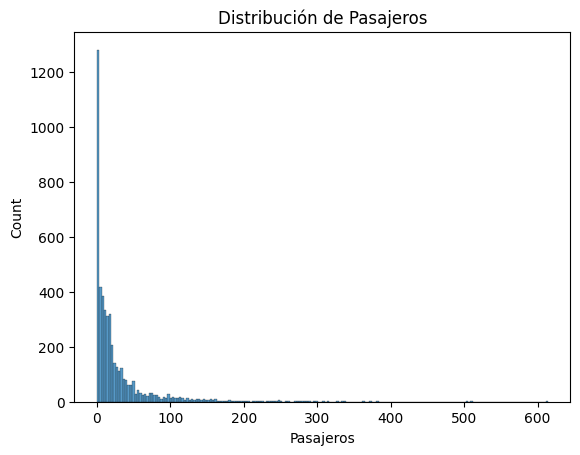

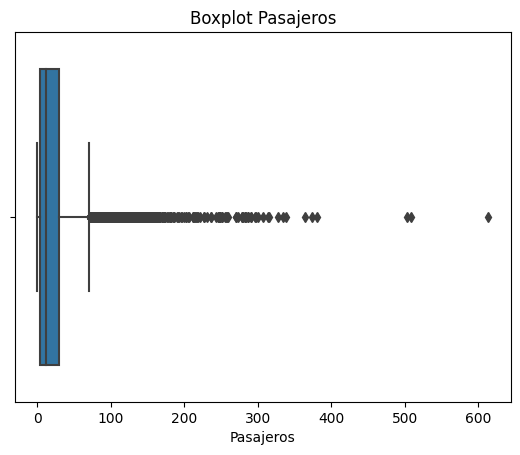

In [23]:

#Columna a explorar: 'Pasajeros'

sns.histplot(data=df_AE, x='Pasajeros')
plt.title(f'Distribución de Pasajeros')
plt.show()
    
sns.boxplot(data=df_AE, x='Pasajeros')
plt.title(f'Boxplot Pasajeros')
plt.show()

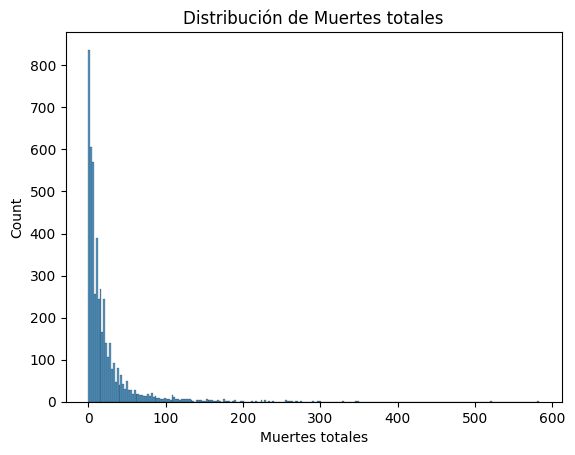

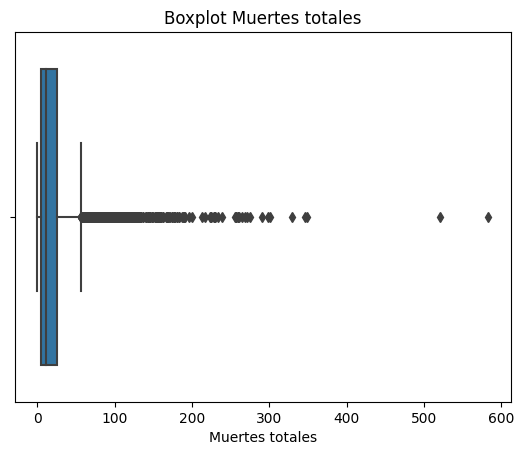

In [24]:

#Columna a explorar: 'Muertes totales'

sns.histplot(data=df_AE, x='Muertes totales')
plt.title(f'Distribución de Muertes totales')
plt.show()
    
sns.boxplot(data=df_AE, x='Muertes totales')
plt.title(f'Boxplot Muertes totales')
plt.show()

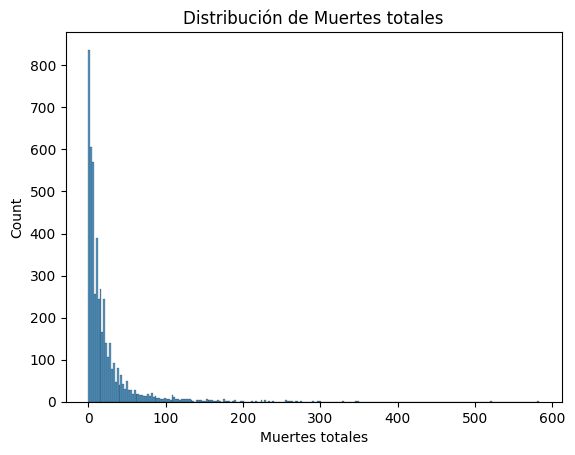

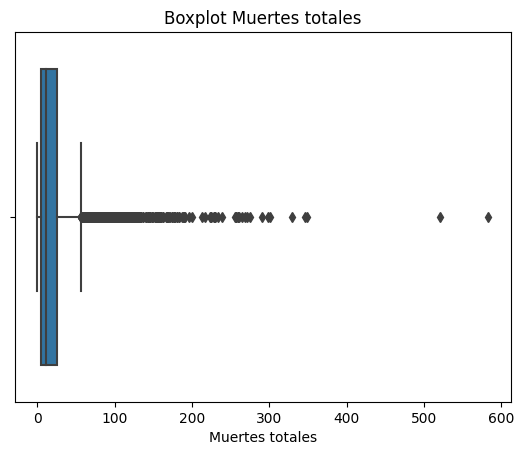

In [25]:

#Columna a explorar: 'Muertes totales'

sns.histplot(data=df_AE, x='Muertes totales')
plt.title(f'Distribución de Muertes totales')
plt.show()
    
sns.boxplot(data=df_AE, x='Muertes totales')
plt.title(f'Boxplot Muertes totales')
plt.show()

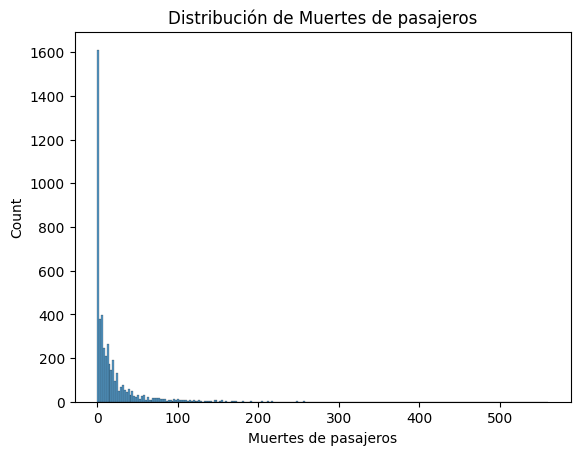

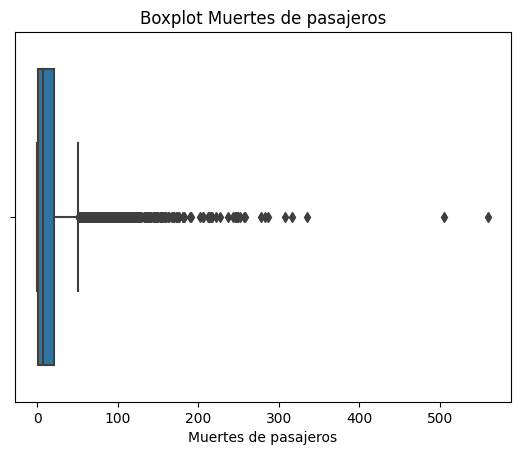

In [26]:

#Columna a explorar: 'Muertes de pasajeros'

sns.histplot(data=df_AE, x='Muertes de pasajeros')
plt.title(f'Distribución de Muertes de pasajeros')
plt.show()
    
sns.boxplot(data=df_AE, x='Muertes de pasajeros')
plt.title(f'Boxplot Muertes de pasajeros')
plt.show()

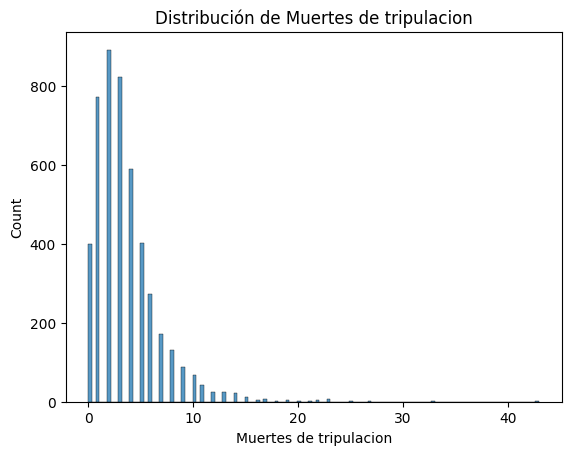

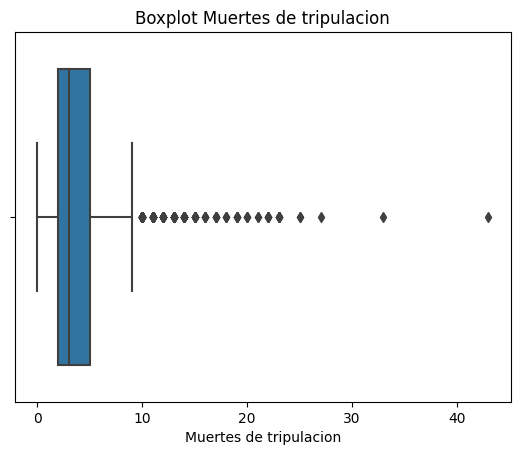

In [27]:

#Columna a explorar: 'Muertes de tripulacion'

sns.histplot(data=df_AE, x='Muertes de tripulacion')
plt.title(f'Distribución de Muertes de tripulacion')
plt.show()
    
sns.boxplot(data=df_AE, x='Muertes de tripulacion')
plt.title(f'Boxplot Muertes de tripulacion')
plt.show()

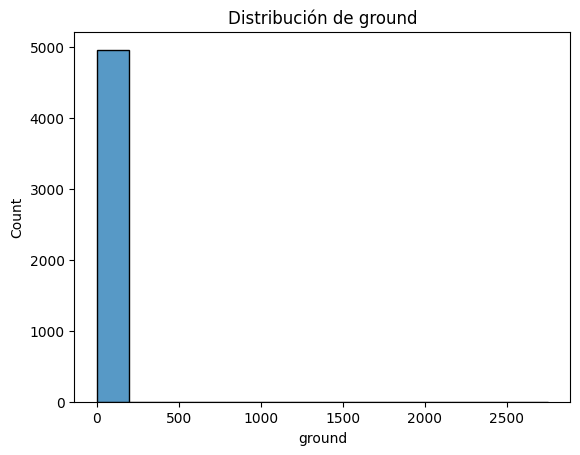

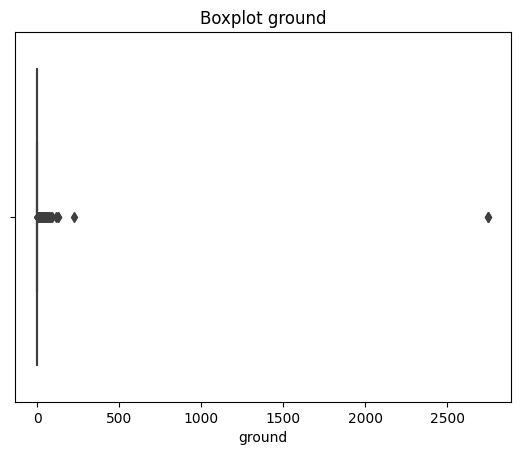

In [28]:

#Columna a explorar: 'ground'

sns.histplot(data=df_AE, x='ground')
plt.title(f'Distribución de ground')
plt.show()
    
sns.boxplot(data=df_AE, x='ground')
plt.title(f'Boxplot ground')
plt.show()

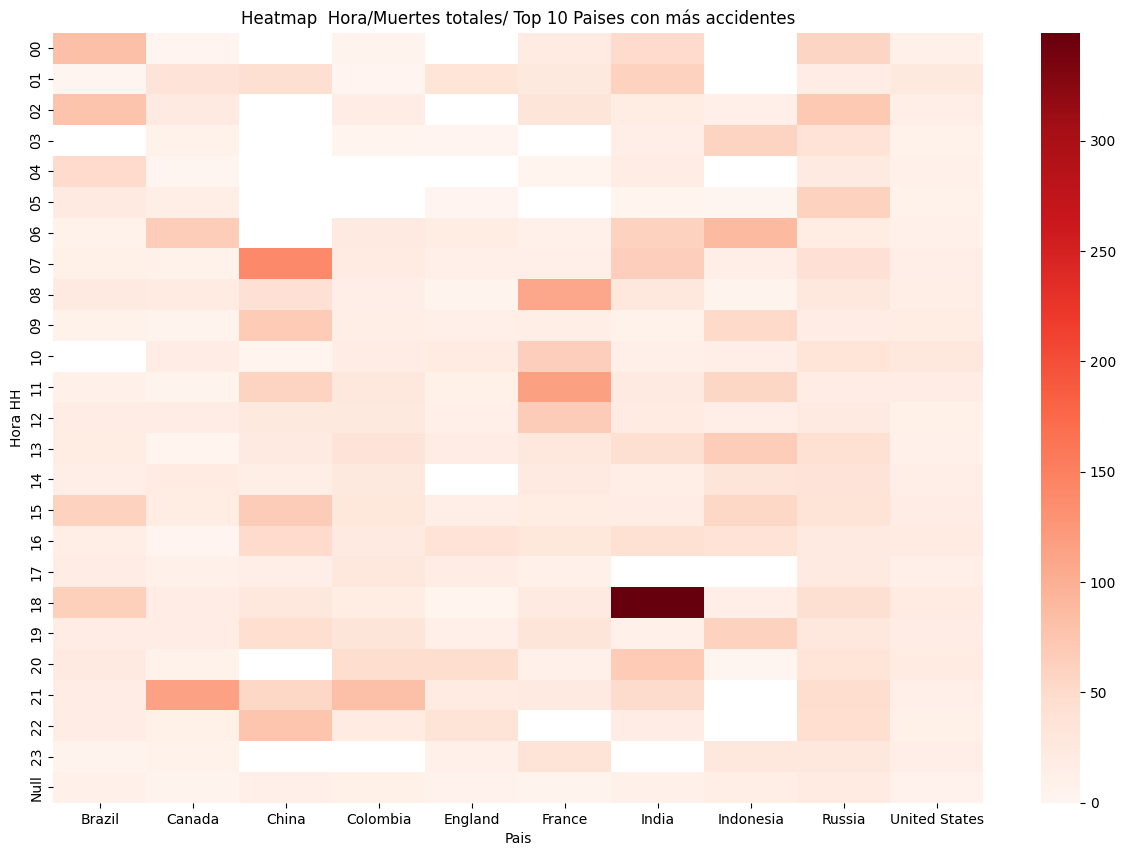

In [29]:

# Se seleccionan los 10 países con mayor número de accidentes:
selected_countries = ['United States', 'Russia', 'Brazil', 'Colombia', 'Canada', 'France', 'India', 'England', 'Indonesia', 'China']

# Se filtra el dataset únicamente con estos países seleccionados:
filtered_df = df_AE[df_AE['Pais'].isin(selected_countries)]

# Se crea una tabla pivot con los valores a analizar:
heatmap = filtered_df.pivot_table(values='Muertes totales', index='Hora HH', columns='Pais')

# Se crea el plot heatmap 
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap, annot=False, fmt="d", cmap="Reds")
plt.title('Heatmap  Hora/Muertes totales/ Top 10 Paises con más accidentes')
plt.xlabel('Pais')
plt.ylabel('Hora HH')
plt.show()



Con base en la información que nos propocionan las gráficas mostradas y un breve análisis de los datos hasta este punto, se puede concluir que  

In [30]:
df_AE.head(5)

,fecha,Operador,Tipo de vuelo,Tipo de Aeronave,Total de personas a bordo,Pasajeros,Tripulacion,Muertes totales,Muertes de pasajeros,Muertes de tripulacion,ground,summary,Hora HH,Pais
0,17/09/1908,Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly...",17,United States
1,07/09/1909,?,Air show,Wright Byplane,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,Null,France
2,12/07/1912,Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,06,United States
3,06/08/1913,Private,?,Curtiss seaplane,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...,Null,Canada
4,09/09/1913,Military - German Navy,?,Zeppelin L-1 (airship),20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...,18,Over the North Sea


In [32]:
df_AE.to_csv('df_AE.csv', index=False)

Se procede a trabajar con los datos en Power BI.